dataset: https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
import pandas as pd

In [3]:
rotten_tomatoes_critic_reviews = pd.read_csv('rotten_tomatoes-datasets/rotten_tomatoes_critic_reviews.csv')
rotten_tomatoes_critic_reviews.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [4]:
df = rotten_tomatoes_critic_reviews[["review_type", "review_content"]]
df.head()

,review_type,review_content
0,Fresh,A fantasy adventure that fuses Greek mythology...
1,Fresh,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,Fresh,With a top-notch cast and dazzling special eff...
3,Fresh,Whether audiences will get behind The Lightnin...
4,Rotten,What's really lacking in The Lightning Thief i...


In [5]:
df.loc[df['review_type'] == 'Fresh', 'label'] = 1 
df.loc[df['review_type'] == 'Rotten', 'label'] = 0  

# Remove NaNs

In [6]:
df.isna().sum()

review_type           0
review_content    65806
label                 0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

review_type       0
review_content    0
label             0
dtype: int64

# Display Data

In [9]:
import seaborn as sns

Text(0.5, 1.0, 'Dataframe count of Fresh vs. Rotten Reviews')

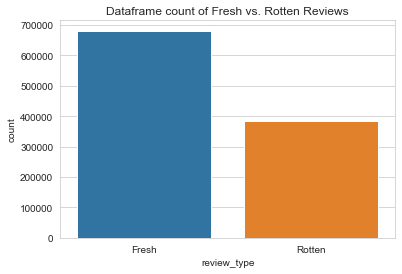

In [10]:
sns.set_style("whitegrid")
sns.countplot(df.review_type).set_title("Dataframe count of Fresh vs. Rotten Reviews")

In [11]:
df = df.drop('review_type', 1)
df.head()

,review_content,label
0,A fantasy adventure that fuses Greek mythology...,1.0
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1.0
2,With a top-notch cast and dazzling special eff...,1.0
3,Whether audiences will get behind The Lightnin...,1.0
4,What's really lacking in The Lightning Thief i...,0.0


# Clean Text

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re, string, unicodedata
from bs4 import BeautifulSoup
from string import punctuation

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoneev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# List of default stopwords
stop = set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
# List of default punctuations
punctuation = list(string.punctuation)
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [15]:
stop.update(punctuation)

In [16]:
# Strip HTML
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing Punctuations appended to strings
def remove_punctuation_attached_to_strings(text):
    return re.sub(r'[^\w\s]', '', text)

# Removing URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords and punctuation from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_punctuation_attached_to_strings(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text

In [17]:
df

,review_content,label
0,A fantasy adventure that fuses Greek mythology...,1.0
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1.0
2,With a top-notch cast and dazzling special eff...,1.0
3,Whether audiences will get behind The Lightnin...,1.0
4,What's really lacking in The Lightning Thief i...,0.0
...,...,...
1130008,A rousing reconstruction of the 1879 Battle of...,1.0
1130013,"Seen today, it's not only a startling indictme...",1.0
1130014,A rousing visual spectacle that's a prequel of...,1.0
1130015,"A simple two-act story: Prelude to war, and th...",0.0


In [18]:
df.loc[0,'review_content']

'A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will thrill to the visual spectacle'

In [19]:
# Apply function on text column
df['review_content'] = df['review_content'].str.lower()
df['review_content_clean'] = df['review_content'].apply(denoise_text)

In [20]:
df

,review_content,label,review_content_clean
0,a fantasy adventure that fuses greek mythology...,1.0,fantasy adventure fuses greek mythology contem...
1,"uma thurman as medusa, the gorgon with a coiff...",1.0,uma thurman medusa gorgon coiffure writhing sn...
2,with a top-notch cast and dazzling special eff...,1.0,topnotch cast dazzling special effects tide te...
3,whether audiences will get behind the lightnin...,1.0,whether audiences get behind lightning thief h...
4,what's really lacking in the lightning thief i...,0.0,whats really lacking lightning thief genuine s...
...,...,...,...
1130008,a rousing reconstruction of the 1879 battle of...,1.0,rousing reconstruction 1879 battle rorkes drift
1130013,"seen today, it's not only a startling indictme...",1.0,seen today startling indictment british imperi...
1130014,a rousing visual spectacle that's a prequel of...,1.0,rousing visual spectacle thats prequel cy endf...
1130015,"a simple two-act story: prelude to war, and th...",0.0,simple twoact story prelude war war former con...


In [21]:
df.loc[0,'review_content_clean']

'fantasy adventure fuses greek mythology contemporary american places values anyone around 15 give take couple years thrill visual spectacle'

# Most Common Words 

In [22]:
from collections import Counter

In [23]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

In [24]:
corpus = get_corpus(df.review_content_clean)
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'film': 159620,
 'movie': 120069,
 'one': 85247,
 'like': 71845,
 'story': 57313,
 'much': 44737,
 'good': 43463,
 'even': 43387,
 'films': 36884,
 'time': 35755}

# N-Gram

In [25]:
import matplotlib.pyplot as plt

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

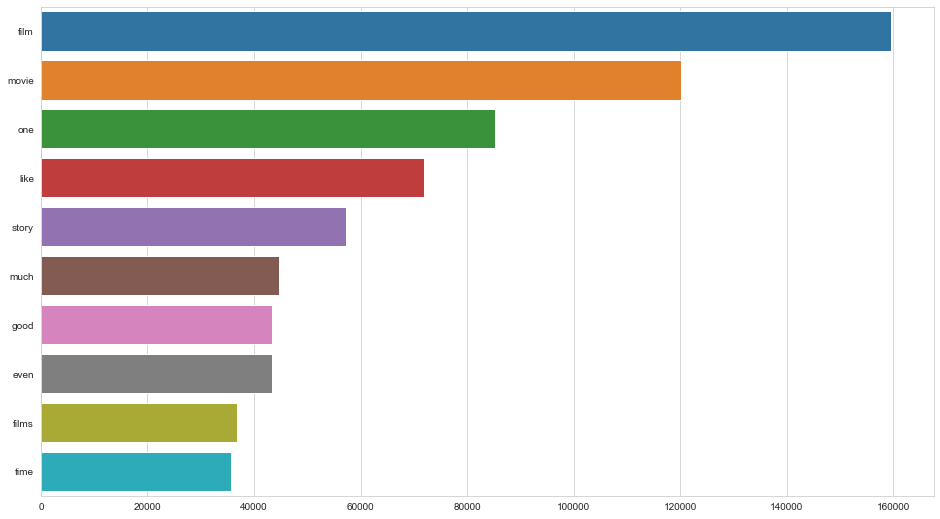

In [27]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.review_content_clean,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()),y = list(most_common_uni.keys()))

<AxesSubplot:>

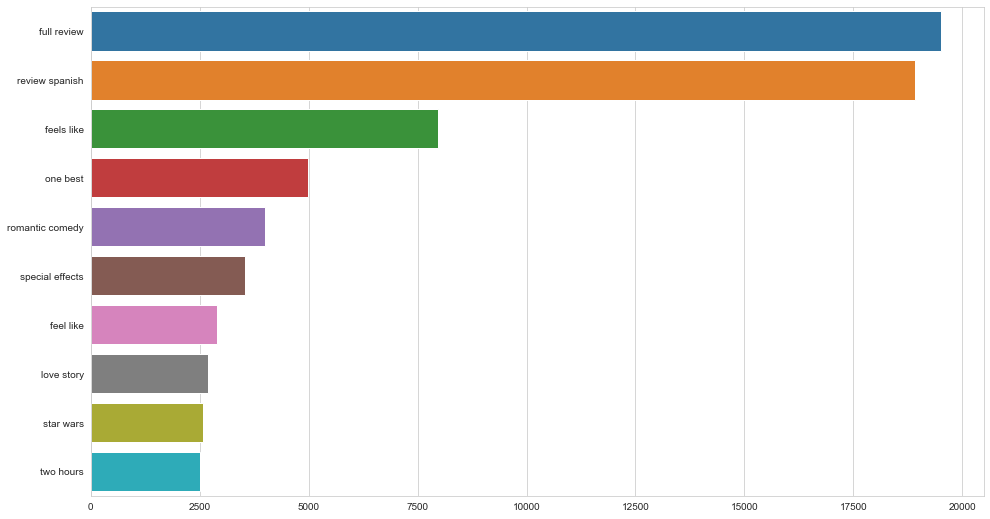

In [28]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.review_content_clean,10,2)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()),y = list(most_common_uni.keys()))

<AxesSubplot:>

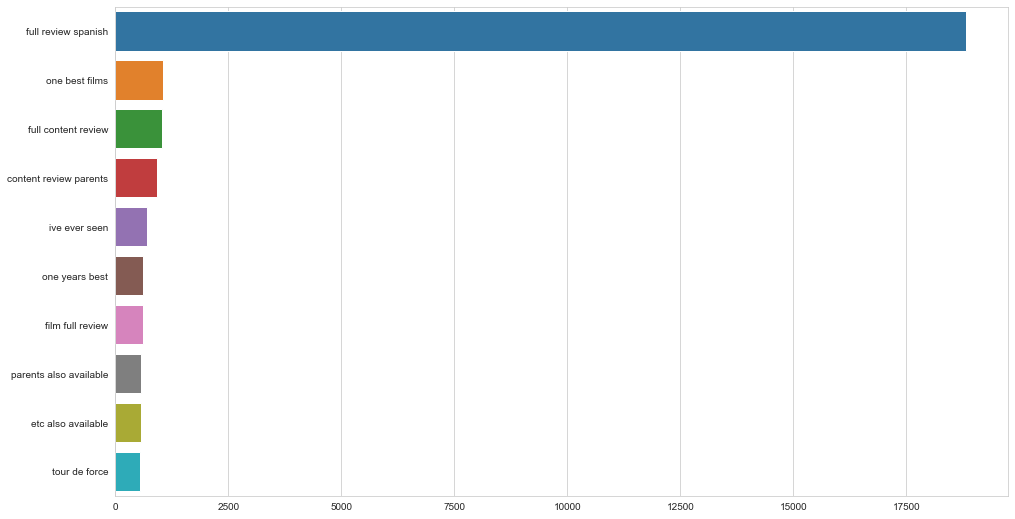

In [29]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.review_content_clean,10,3)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()),y = list(most_common_uni.keys()))

# Word Cloud

In [30]:
!pip install wordcloud

You should consider upgrading via the '/Users/antoneev/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

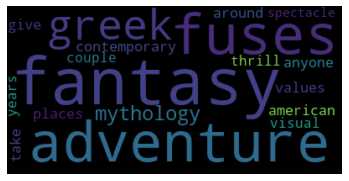

In [32]:
# Start with one review:
text = df.review_content_clean[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Split Dataset

In [33]:
df = df.drop('review_content', 1)
df.head()

,label,review_content_clean
0,1.0,fantasy adventure fuses greek mythology contem...
1,1.0,uma thurman medusa gorgon coiffure writhing sn...
2,1.0,topnotch cast dazzling special effects tide te...
3,1.0,whether audiences get behind lightning thief h...
4,0.0,whats really lacking lightning thief genuine s...


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(df.review_content_clean, df.label, test_size=0.30)

In [36]:
print('Train Content', x_train.count())
print('Train Labels', y_train.count())
print('Test Content', x_test.count())
print('Test Labels', y_test.count())

Train Content 744947
Train Labels 744947
Test Content 319264
Test Labels 319264


# Scaling Down Data Size

In [37]:
x_train_DownSize = x_train[0:7000]
x_test_DownSize = x_test[0:3000]
y_train_DownSize = y_train[0:7000]
y_test_DownSize = y_test[0:3000]

In [38]:
print('Train Content Downsize:', len(x_train_DownSize))
print('Train Labels Downsize:', len(y_train_DownSize))
print('Test Content Downsize:', len(x_test_DownSize))
print('Test Labels Downsize:', len(y_test_DownSize))

Train Content Downsize: 7000
Train Labels Downsize: 7000
Test Content Downsize: 3000
Test Labels Downsize: 3000


# Tokenization

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence

In [40]:
maxvocab = 1500
maxlen = 300

In [41]:
tokenizer = text.Tokenizer(num_words=maxvocab)
tokenizer.fit_on_texts(x_train_DownSize)
tokenized_train = tokenizer.texts_to_sequences(x_train_DownSize)
x_train_DownSize = sequence.pad_sequences(tokenized_train, maxlen=maxlen)
tokenized_test = tokenizer.texts_to_sequences(x_test_DownSize)
x_test_DownSize = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

# Load Glove Text File

In [42]:
import numpy as np

In [43]:
EMBEDDING_FILE = 'rotten_tomatoes-datasets/glove.twitter.27B.100d.txt'

In [44]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [45]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(maxvocab, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= maxvocab: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

# Train LSTM Model

In [46]:
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from tensorflow import keras
import tensorflow as tf

In [47]:
model = Sequential()
model.add(Embedding(maxvocab, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
batch_size = 256
epochs = 100
embed_size = 100

#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=1e-4,
  decay_steps=1000,
  decay_rate=0.9)

#configuring and compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=1e-3, restore_best_weights=True)

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          150000    
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 318,769
Trainable params: 168,769
Non-trainable params: 150,000
_________________________________________________________________


In [50]:
#start the training
history = model.fit(x_train_DownSize, 
                    y_train_DownSize, 
                    batch_size = batch_size , 
                    validation_data = (x_test_DownSize,y_test_DownSize) , 
                    epochs = epochs , 
                    callbacks = callback,
                    verbose = 1)

Epoch 1/100
28/28 [==============================] - 77s 3s/step - loss: 0.6658 - accuracy: 0.6234 - val_loss: 0.6461 - val_accuracy: 0.6507
Epoch 2/100
28/28 [==============================] - 71s 3s/step - loss: 0.6526 - accuracy: 0.6374 - val_loss: 0.6402 - val_accuracy: 0.6507
Epoch 3/100
28/28 [==============================] - 73s 3s/step - loss: 0.6464 - accuracy: 0.6374 - val_loss: 0.6339 - val_accuracy: 0.6507
Epoch 4/100
28/28 [==============================] - 70s 3s/step - loss: 0.6407 - accuracy: 0.6373 - val_loss: 0.6265 - val_accuracy: 0.6507
Epoch 5/100
28/28 [==============================] - 74s 3s/step - loss: 0.6329 - accuracy: 0.6379 - val_loss: 0.6197 - val_accuracy: 0.6520
Epoch 6/100
28/28 [==============================] - 76s 3s/step - loss: 0.6254 - accuracy: 0.6416 - val_loss: 0.6107 - val_accuracy: 0.6547
Epoch 7/100
28/28 [==============================] - 72s 3s/step - loss: 0.6176 - accuracy: 0.6471 - val_loss: 0.6059 - val_accuracy: 0.6767
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 53s 2s/step - loss: 0.5591 - accuracy: 0.7039 - val_loss: 0.5586 - val_accuracy: 0.7223
Epoch 60/100
28/28 [==============================] - 53s 2s/step - loss: 0.5604 - accuracy: 0.7013 - val_loss: 0.5593 - val_accuracy: 0.7140
Epoch 61/100
28/28 [==============================] - 52s 2s/step - loss: 0.5629 - accuracy: 0.6983 - val_loss: 0.5599 - val_accuracy: 0.7173
Epoch 62/100
28/28 [==============================] - 53s 2s/step - loss: 0.5594 - accuracy: 0.7000 - val_loss: 0.5581 - val_accuracy: 0.7193
Epoch 63/100
28/28 [==============================] - 53s 2s/step - loss: 0.5545 - accuracy: 0.7060 - val_loss: 0.5592 - val_accuracy: 0.7150
Epoch 64/100
28/28 [==============================] - 54s 2s/step - loss: 0.5614 - accuracy: 0.6950 - val_loss: 0.5577 - val_accuracy: 0.7197
Epoch 65/100
28/28 [==============================] - 54s 2s/step - loss: 0.5588 - accuracy: 0.7047 - val_loss: 0.5587 - val_accuracy: 0.7153
Epoch 

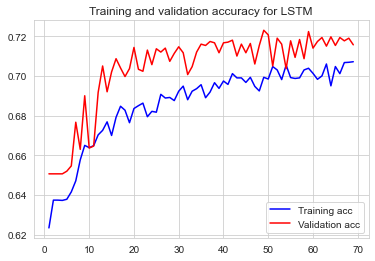

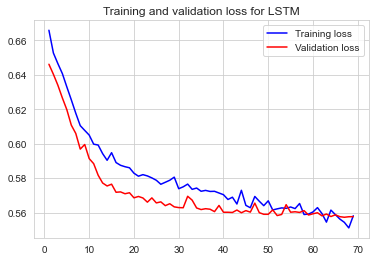

In [51]:
#getting train and validation accuracies
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#getting train and validation losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy for LSTM')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss for LSTM')
plt.legend()

plt.show()

In [52]:
model.save("lstm.h5")

# Test Model

In [53]:
model = keras.models.load_model('lstm.h5')
pred = model.predict(x_test_DownSize)

predictions = []

for i in pred:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0) 

In [56]:
pred

array([[0.44070444],
       [0.9047582 ],
       [0.81598735],
       ...,
       [0.7753824 ],
       [0.6674577 ],
       [0.47028443]], dtype=float32)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [58]:
lstm_accuracy_score = accuracy_score(predictions, y_test_DownSize)
lstm_precision_score = precision_score(predictions, y_test_DownSize)
lstm_recall_score = recall_score(predictions, y_test_DownSize)
lstm_f1_score = f1_score(predictions, y_test_DownSize)

print('Accuracy on testing set:', lstm_accuracy_score)
print('Precision on testing set:', lstm_precision_score)
print('Recall on testing set:', lstm_recall_score)
print('F1 on testing set:', lstm_f1_score)

Accuracy on testing set: 0.723
Precision on testing set: 0.8739754098360656
Recall on testing set: 0.7446529899607158
F1 on testing set: 0.8041480084845628


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(predictions, y_test_DownSize)

array([[ 463,  246],
       [ 585, 1706]])

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

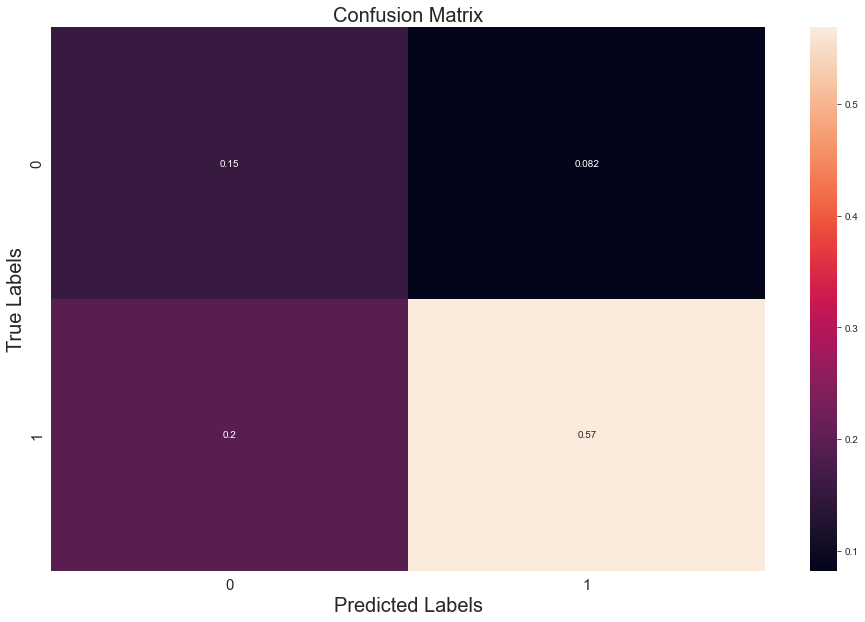

In [62]:
matrix = confusion_matrix(predictions, y_test_DownSize, normalize='all')
plt.figure(figsize=(16, 10))
ax = plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)